#Neural Network using pytorch built in fucntions.

In [1]:
!pip install umap

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import umap
from mpl_toolkits.mplot3d import Axes3D

In [3]:
!pip install umap-learn

In [4]:
n = 100
d = 3

x = np.random.uniform(-1, 1, (n, d))

* Non Linear Equation

In [5]:
x = np.random.uniform(-1, 1, (n, 3))

weights_true = np.array([[6, 1, 1],]).T
bias_true = np.array([1])

y_true = (x ** 3) @ weights_true + (x ** 2) @ weights_true + x @ weights_true + bias_true

In [6]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)

  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(44.6574, grad_fn=<MseLossBackward0>)


In [7]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(44.6574, grad_fn=<MseLossBackward0>)
tensor(38.6216, grad_fn=<MseLossBackward0>)


In [8]:
def plot_4d(X, y, y_pred=None):
 # Compute a 3D embedding of the data using UMAP
  umap_3d = umap.UMAP(n_components=3)
  X_umap_3d = umap_3d.fit_transform(X)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

tensor(38.6216, grad_fn=<MseLossBackward0>)
tensor(38.1908, grad_fn=<MseLossBackward0>)
tensor(37.7416, grad_fn=<MseLossBackward0>)
tensor(37.2751, grad_fn=<MseLossBackward0>)
tensor(36.7883, grad_fn=<MseLossBackward0>)
tensor(36.2786, grad_fn=<MseLossBackward0>)
tensor(35.7436, grad_fn=<MseLossBackward0>)
tensor(35.1803, grad_fn=<MseLossBackward0>)
tensor(34.5864, grad_fn=<MseLossBackward0>)
tensor(33.9595, grad_fn=<MseLossBackward0>)
tensor(33.2983, grad_fn=<MseLossBackward0>)
tensor(32.5985, grad_fn=<MseLossBackward0>)
tensor(31.8590, grad_fn=<MseLossBackward0>)
tensor(31.0778, grad_fn=<MseLossBackward0>)
tensor(30.2562, grad_fn=<MseLossBackward0>)
tensor(29.3937, grad_fn=<MseLossBackward0>)
tensor(28.4916, grad_fn=<MseLossBackward0>)
tensor(27.5591, grad_fn=<MseLossBackward0>)
tensor(26.5953, grad_fn=<MseLossBackward0>)
tensor(25.6043, grad_fn=<MseLossBackward0>)
tensor(24.5924, grad_fn=<MseLossBackward0>)
tensor(23.5633, grad_fn=<MseLossBackward0>)
tensor(22.5221, grad_fn=<MseLoss

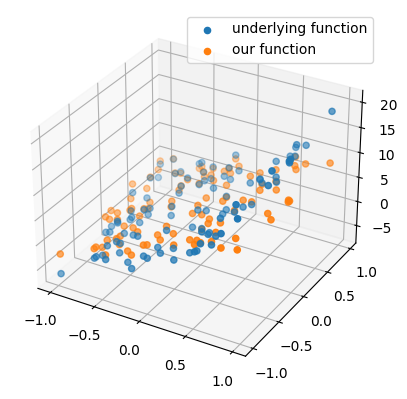

In [9]:
# Now we run the training loop
from typing import Callable

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.01, num_epochs=40)
plot_4d(x, y_true, model(x_tensor).detach())